In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set_theme(style="whitegrid", palette="viridis")

print("Libraries imported successfully.")

Libraries imported successfully.


### Data Loading and Preparation

In [15]:
df = pd.read_csv("C:/Users/anujo/Downloads/chatgpt_reviews.csv")
print("Dataset loaded successfully.")

Dataset loaded successfully.


###  Data Cleaning and Preprocessing ---

In [18]:

df.columns = ['review_id', 'review', 'ratings', 'review_date']

df['review'] = df['review'].fillna('')

df['review_date'] = pd.to_datetime(df['review_date'])
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df.dropna(subset=['ratings'], inplace=True)
df['ratings'] = df['ratings'].astype(int)

In [19]:
print("\n--- Data after cleaning and preparation ---")
df.info()
print("\nFirst 5 rows of cleaned data:")
print(df.head())



--- Data after cleaning and preparation ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    196727 non-null  object        
 1   review       196727 non-null  object        
 2   ratings      196727 non-null  int64         
 3   review_date  196727 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.0+ MB

First 5 rows of cleaned data:
                              review_id  \
0  6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1  81caeefd-3a28-4601-a898-72897ac906f5   
2  452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3  372a4096-ee6a-4b94-b046-cef0b646c965   
4  b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   

                                              review  ratings  \
0                                               good        5   
1                                               good    

### # Step 3: Exploratory Data Analysis (EDA) - Ratings Distribution

C:\Users\anujo\AppData\Local\Temp\ipykernel_6076\3031801653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ratings', data=df, palette='viridis', order=df['ratings'].value_counts().index)


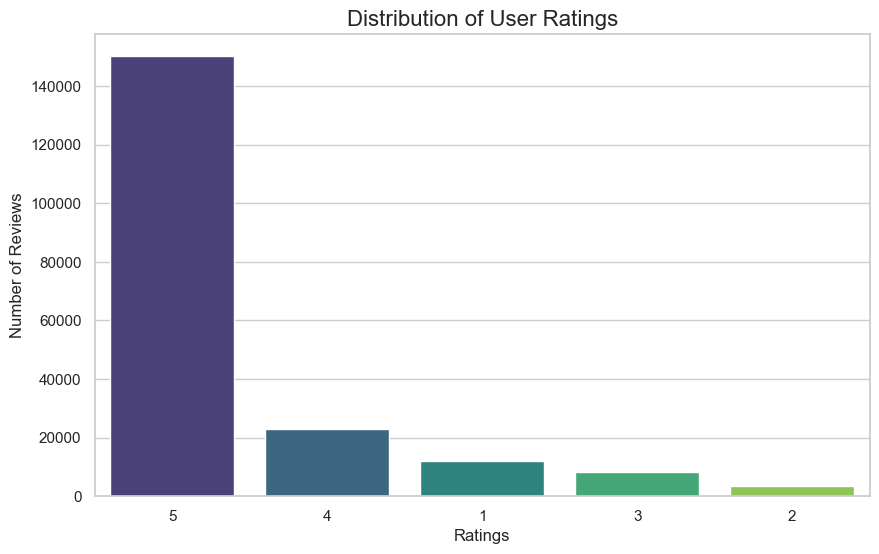

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ratings', data=df, palette='viridis', order=df['ratings'].value_counts().index)
plt.title('Distribution of User Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()


### Step 4: Text Analysis - Frequent Words Bar Chart (using only Pandas)

In [24]:
positive_reviews_df = df[df['ratings'] >= 4].copy()


stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']
custom_stopwords = ['app', 'good', 'nice', 'best', 'great', 'chatgpt', 'gpts', 'gpt', 'use', 'ai', 'really', 'love', 'even', 'will', 'im']
stopwords.extend(custom_stopwords)


C:\Users\anujo\AppData\Local\Temp\ipykernel_6076\2837106906.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_df, palette='plasma')


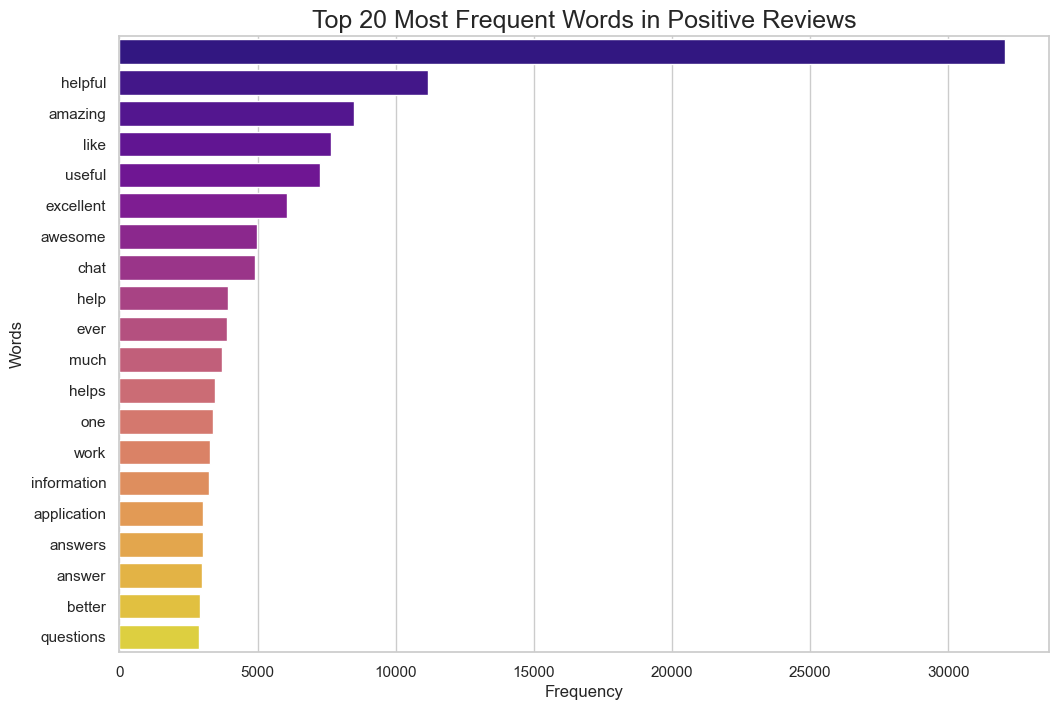


Analysis and visualization complete.


In [25]:
positive_reviews_df['review_lower'] = positive_reviews_df['review'].str.lower()

# 2. Split sentences into words. This creates a list of words in each row.
#    Then, .explode() transforms each item of a list-like to a row.
words_series = positive_reviews_df['review_lower'].str.split().explode()

# 3. Remove punctuation from the words series.
words_series = words_series.str.replace('[^\w\s]', '', regex=True)

# 4. Remove stopwords and any empty strings that might result from cleaning.
words_series = words_series[~words_series.isin(stopwords)]
words_series = words_series.dropna()

# 5. Get the frequency of each word using .value_counts().
word_counts = words_series.value_counts().nlargest(20)

# Create a DataFrame for plotting.
common_words_df = pd.DataFrame(word_counts).reset_index()
common_words_df.columns = ['word', 'count']

# --- Visualization ---
# Plot the horizontal bar chart.
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='word', data=common_words_df, palette='plasma')
plt.title('Top 20 Most Frequent Words in Positive Reviews', fontsize=18)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.show()

print("\nAnalysis and visualization complete.")

C:\Users\anujo\AppData\Local\Temp\ipykernel_6076\2853908673.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_df_neg, palette='coolwarm')


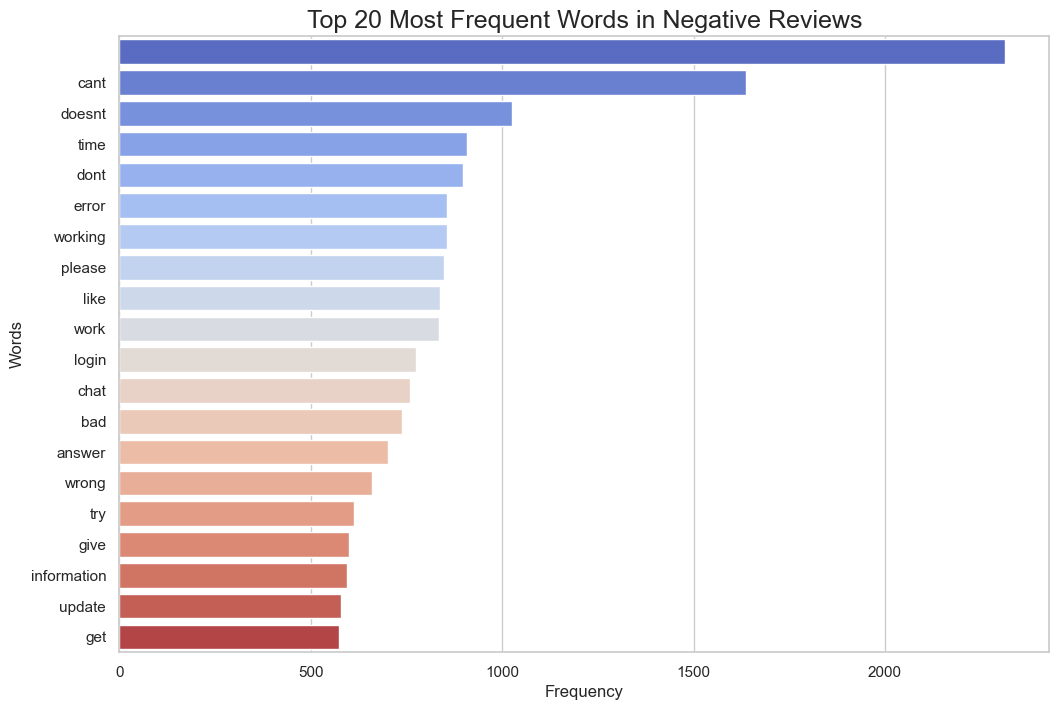


Analysis and visualization complete.


In [26]:
negative_reviews_df = df[df['ratings'] <= 2].copy()

# --- Pandas-based Text Processing ---
# 1. Convert reviews to lowercase.
negative_reviews_df['review_lower'] = negative_reviews_df['review'].str.lower()

# 2. Split sentences into words and create a series of words.
words_series_neg = negative_reviews_df['review_lower'].str.split().explode()

# 3. Remove punctuation.
words_series_neg = words_series_neg.str.replace('[^\w\s]', '', regex=True)

# 4. Remove stopwords and empty strings.
words_series_neg = words_series_neg[~words_series_neg.isin(stopwords)]
words_series_neg = words_series_neg.dropna()

# 5. Get the frequency of each word.
word_counts_neg = words_series_neg.value_counts().nlargest(20)

# Create a DataFrame for plotting.
common_words_df_neg = pd.DataFrame(word_counts_neg).reset_index()
common_words_df_neg.columns = ['word', 'count']

# --- Visualization ---
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='word', data=common_words_df_neg, palette='coolwarm')
plt.title('Top 20 Most Frequent Words in Negative Reviews', fontsize=18)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.show()


print("\nAnalysis and visualization complete.")


In [27]:
summary_text = """
# Project Summary & Key Findings

This analysis of over 196,000 ChatGPT reviews reveals a highly positive user sentiment, primarily driven by the application's utility and ease of use.

## Key Insights:

1.  **Overwhelmingly Positive Ratings**: The vast majority of users rate the app with 5 stars, indicating strong overall satisfaction.

2.  **Positive Feedback Themes**: The most common words in positive reviews are **'helpful', 'easy', 'work', 'information',** and **'answers'**. This shows that users value ChatGPT as a practical tool for productivity and learning.

3.  **Negative Feedback Themes**: The most frequent words in negative reviews include terms like **'working', 'open', 'time', 'please',** and **'fix'**. This suggests that user frustration is not with the AI's quality, but with technical issues such as the app not opening, slow performance, or other bugs.

## Recommendations:

* **For the Development Team**: Prioritize app stability and performance. Since the core AI is well-regarded, focusing on fixing bugs, improving load times, and ensuring the app is consistently accessible will address the main sources of user dissatisfaction.

* **For the Product Team**: Continue to lean into the app's strengths as a helpful and easy-to-use tool. Marketing and feature development should highlight its utility for work, study, and finding information quickly.

* **Future Analysis**: A deeper dive into 3-star reviews could reveal insights into users who are on the fence—their feedback could highlight areas for significant improvement that could convert them into happier users.
"""

print(summary_text)

print("\nAnalysis and visualization complete.")


# Project Summary & Key Findings

This analysis of over 196,000 ChatGPT reviews reveals a highly positive user sentiment, primarily driven by the application's utility and ease of use.

## Key Insights:

1.  **Overwhelmingly Positive Ratings**: The vast majority of users rate the app with 5 stars, indicating strong overall satisfaction.

2.  **Positive Feedback Themes**: The most common words in positive reviews are **'helpful', 'easy', 'work', 'information',** and **'answers'**. This shows that users value ChatGPT as a practical tool for productivity and learning.

3.  **Negative Feedback Themes**: The most frequent words in negative reviews include terms like **'working', 'open', 'time', 'please',** and **'fix'**. This suggests that user frustration is not with the AI's quality, but with technical issues such as the app not opening, slow performance, or other bugs.

## Recommendations:

* **For the Development Team**: Prioritize app stability and performance. Since the core AI is we